In [ ]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
 

import torch.nn as nn

MSE: 0.48
RMSE: 0.69


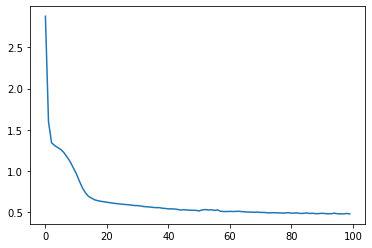

In [8]:
# DNN example from the website 
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target

import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split

# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [47]:
## begin for RFLoca
prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/"
path=prefix+"Rfloca-TPC-DS-500GB-training.csv"
df = pd.read_csv(path)  
df.head()

,executor_instances,executor_cores,executor-memory (MB),input data size (MB),query,dag depth,dag width,stage_count,predicted_runtime(seconds),actual,...,Subquery,Union,Expand,ExchangeHashpartitioning,ExchangeSinglePartition,ReusedExchange,Empty,TakeOrderedAndProject,CollectLimit,Error
0,10,2,4000,500,Q11,4,8,21,338,210,...,0,0,0,16,0,0,0,1,0,0
1,10,2,4000,500,Q12,3,1,5,40,46,...,0,0,0,2,0,0,1,1,0,0
2,10,2,4000,500,Q13,2,1,7,32,66,...,0,0,0,0,1,0,0,0,0,1
3,10,2,4000,500,Q15,4,3,7,121,108,...,0,0,0,5,0,0,0,1,0,0
4,10,2,4000,500,Q16,3,3,8,278,138,...,0,0,0,3,1,0,0,0,0,1


In [48]:
df.shape

(227, 28)

In [49]:
columns_list = list(df)
print(columns_list)

['executor_instances', 'executor_cores', 'executor-memory (MB)', 'input data size (MB)', 'query', 'dag depth', ' dag width', 'stage_count', ' predicted_runtime(seconds)', 'actual', 'FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']


In [50]:
training_x = df[['executor_instances', 'executor_cores', 'executor-memory (MB)', 'input data size (MB)','dag depth', ' dag width', 'FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']].to_numpy()
training_y = df[['actual']].to_numpy()

In [51]:
train,test = train_test_split(df, train_size=0.7,shuffle=True)


X_train = train[['executor_instances', 'executor_cores', 'executor-memory (MB)', 'input data size (MB)','dag depth', ' dag width', 'FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']].to_numpy()
y_train = train[['actual']].to_numpy()

# train_x = train[[c for c in df.columns if c != 'label']].values
# test_x = test[[c for c in df.columns if c != 'label']].values

# train_y = train.label.values.reshape(-1, 1)
# test_y = test.label.values.reshape(-1, 1)
X_test = test[['executor_instances', 'executor_cores', 'executor-memory (MB)', 'input data size (MB)','dag depth', ' dag width', 'FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']].to_numpy()
y_test = test[['actual']].to_numpy()
train.shape,  test.shape

((158, 28), (69, 28))

In [52]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


In [40]:
X_train.shape, y_train.shape

(torch.Size([59, 24]), torch.Size([59, 1]))

MSE: 36084.13
RMSE: 189.96


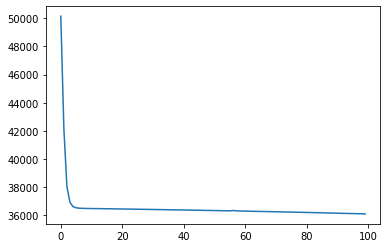

In [62]:
# Define the model
model = nn.Sequential(
    nn.Linear(24, 120),
    nn.ReLU(),
     nn.Linear(120, 60),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 15),
    nn.ReLU(),
    nn.Linear(15, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)


import torch.nn as nn
import torch.optim as optim

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)


# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 2  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [63]:

predict_q1 = np.array([10,2,4000,500, 4,3 ,6,8,3,3,6,8,4,2,0,0,0,6,0,0,0,1,0,0])
print(len(predict_q1))
predict_q1 = torch.tensor(predict_q1, dtype=torch.float32)
                          
predict_q91 = np.array([14,2,4000,500,3,2,7,7,5,5,2,9,3,1,0,0,0,3,0,0,1,0,0,0])
print(len(predict_q91))
predict_q91 = torch.tensor(predict_q91, dtype=torch.float32)

predict_q92 = np.array([14,2,4000,500,3,2,5,6,3,3,3,7,2,1,0,0,0,2,1,0,0,0,0,1])
print(len(predict_q92))
predict_q92 = torch.tensor(predict_q92, dtype=torch.float32)

predict_q93 = np.array([14,2,4000,500,3,2,3,2,1,1,2,3,2,1,0,0,0,3,0,0,0,1,0,0])
print(len(predict_q93))
predict_q93 = torch.tensor(predict_q93, dtype=torch.float32)

predict_q94 = np.array([14,2,4000,500,3,3,6,4,3,3,3,7,3,2,0,0,0,3,1,0,0,0,0,1])
print(len(predict_q94))
predict_q94 = torch.tensor(predict_q94, dtype=torch.float32)
                          
                          

24
24
24
24
24


In [64]:
model.eval()

with torch.no_grad():
    # Test out inference with 5 samples
    y_pred = model(predict_q1)
    print(f"q1 -> {y_pred[0].numpy()} (expected 51 s)")
    y_pred = model(predict_q91)
    print(f"q91 -> {y_pred[0].numpy()} (expected 43 s)")
    y_pred = model(predict_q92)
    print(f"q92 -> {y_pred[0].numpy()} (expected 49 s)")
    y_pred = model(predict_q93)
    print(f"q93 -> {y_pred[0].numpy()} (expected 192 s)")
    y_pred = model(predict_q94)
    print(f"q94 -> {y_pred[0].numpy()} (expected 72 s)")

q1 -> 113.57866668701172 (expected 51 s)
q91 -> 113.37533569335938 (expected 43 s)
q92 -> 112.86041259765625 (expected 49 s)
q93 -> 112.56729125976562 (expected 192 s)
q94 -> 112.99073791503906 (expected 72 s)


In [82]:
## testing for RFLoca
prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/"
path=prefix+"Rfloca-TPC-DS-500GB-training.csv"
df = pd.read_csv(path)  
print(df.shape)
test_data = df[['executor_instances', 'executor_cores', 'executor-memory (MB)', 'input data size (MB)','dag depth', ' dag width', 'FileScan', 'Filter', 'BroadcastHashJoin', 'BroadcastExchange', 'HashAggregate', 'Project', 'Sort', 'SortMergeJoin', 'Subquery', 'Union', 'Expand', 'ExchangeHashpartitioning', 'ExchangeSinglePartition', 'ReusedExchange', 'Empty', 'TakeOrderedAndProject', 'CollectLimit', 'Error']].to_numpy()

test_data = torch.tensor(test_data, dtype=torch.float32)

(227, 28)


In [84]:


y_test_pred = model(test_data)
y_test_np = y_test_pred.detach().numpy()
y_test_pd = pd.DataFrame(y_test_np)
y_test_pd
df["RFLoca"] = y_test_pd

In [86]:
df[["query","RFLoca","actual"]].head()

,query,RFLoca,actual
0,Q11,115.353943,210
1,Q12,112.514938,46
2,Q13,112.758934,66
3,Q15,113.043846,108
4,Q16,113.019630,138


In [87]:
df["reloca_error"] = abs(df["actual"]-df["RFLoca"])/df["actual"]

In [90]:
df["reloca_error"].mean()

0.7944609092285282

In [91]:
 #append data frame to CSV file
    
prefix = "/home/lemaker/open-source/Lab/SparkSQLAnalyticalModelCode/results/"
path=prefix+"Rfloca-TPC-DS-500GB-training-prediction.csv"
df.to_csv(path)

In [ ]:
query_name = "Q"+str(i)        
query_df = df[df["query"]==query_name]
if not query_df.empty: